In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv('trip_count_over_time.csv')
data

,f0_,month,year
0,1095346,1,2021
1,1088929,12,2020
2,1736704,11,2020
3,2248869,10,2020
4,2488225,9,2020
...,...,...,...
87,1037712,10,2013
88,1034359,9,2013
89,1001958,8,2013
90,843417,7,2013


In [9]:
data = data.rename(columns = {'f0_':'ridecount'})
data = data[data['year'] != 2021]
data

,ridecount,month,year
1,1088929,12,2020
2,1736704,11,2020
3,2248869,10,2020
4,2488225,9,2020
5,2329514,8,2020
...,...,...,...
87,1037712,10,2013
88,1034359,9,2013
89,1001958,8,2013
90,843417,7,2013


In [39]:
pd.DataFrame(data.groupby('year')['ridecount'].agg('sum')).reset_index()

,year,ridecount
0,2013,5614888
1,2014,8081216
2,2015,9937969
3,2016,13845655
4,2017,16364657
5,2018,17548339
6,2019,20551697
7,2020,19506857


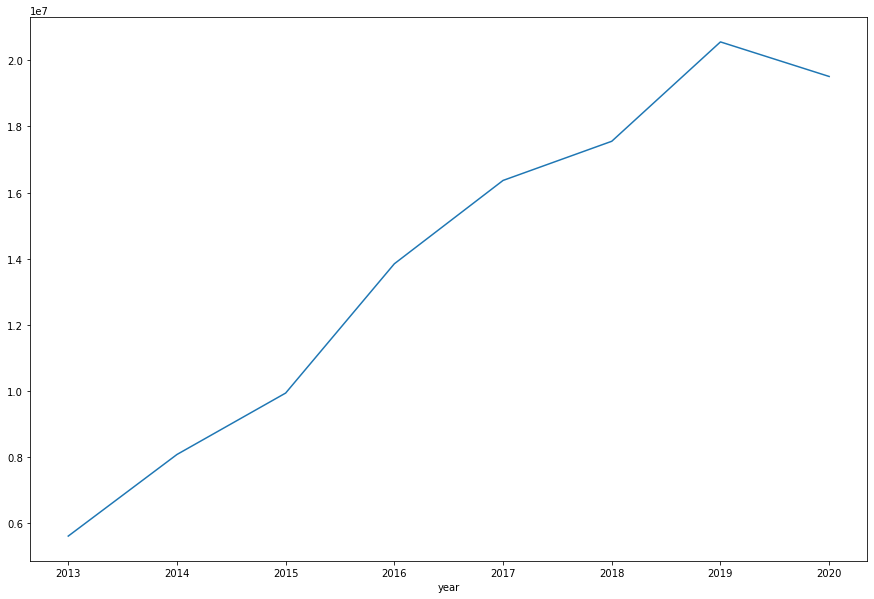

In [12]:
data.groupby('year')['ridecount'].agg('sum').plot(figsize = (15,10))

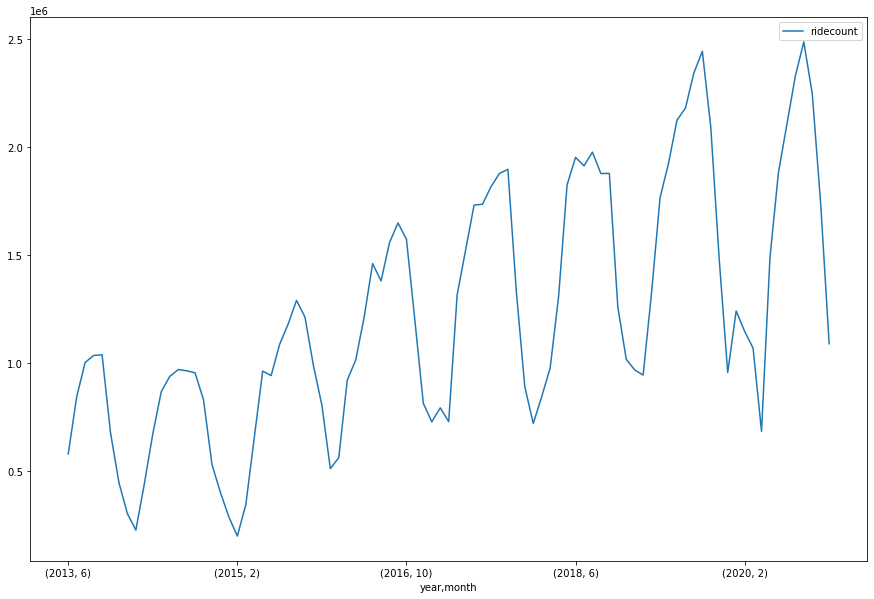

In [11]:
data.groupby(['year', 'month']).agg('sum').plot(figsize = (15,10))

In [15]:
data.dtypes

ridecount    int64
month        int64
year         int64
dtype: object

In [16]:
data2 = data.copy()
data2

,ridecount,month,year
1,1088929,12,2020
2,1736704,11,2020
3,2248869,10,2020
4,2488225,9,2020
5,2329514,8,2020
...,...,...,...
87,1037712,10,2013
88,1034359,9,2013
89,1001958,8,2013
90,843417,7,2013


In [43]:
data['ym'] = data2.year.astype(str) + '-' + data2.month.astype(str)
data

,ridecount,month,year,ym
1,1088929,12,2020,2020-12
2,1736704,11,2020,2020-11
3,2248869,10,2020,2020-10
4,2488225,9,2020,2020-9
5,2329514,8,2020,2020-8
...,...,...,...,...
87,1037712,10,2013,2013-10
88,1034359,9,2013,2013-9
89,1001958,8,2013,2013-8
90,843417,7,2013,2013-7


NameError: name 'plot' is not defined

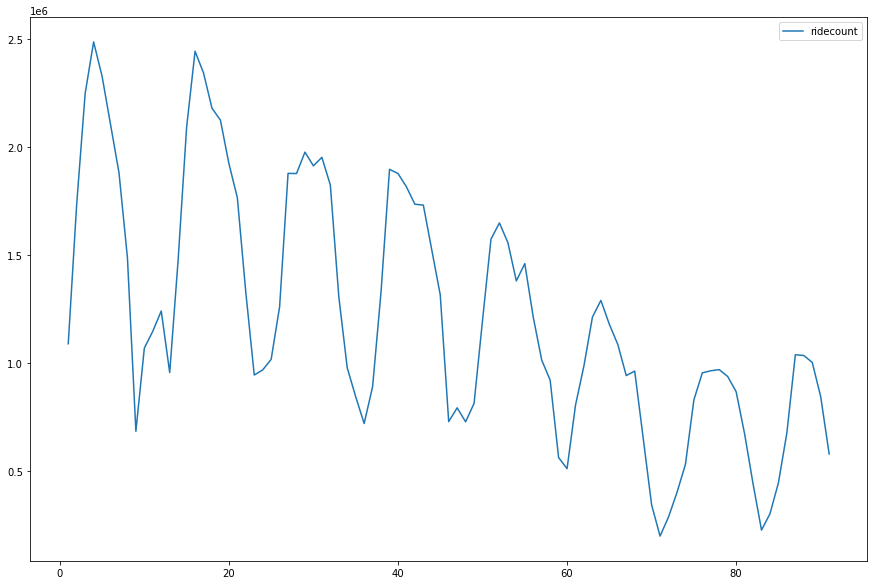

In [27]:
data2[['ym', 'ridecount']].plot(figsize = (15,10))
plot.xticks(labels=[data2['ym']])

In [28]:
import plotly.express as px

In [44]:
fig = px.line(data, 
              x='ym', 
              y='ridecount', 
              title="Monthly Total Rides",
              labels = dict(total_rides="Total Number of Rides", ym="Year-Month"),
              markers=True)
fig.layout.plot_bgcolor = 'white'
fig.update_traces(marker={'size': 12,
                          'color': 'blue'})
fig.update_yaxes(nticks=15, ticks = 'outside', showgrid = False)
fig.update_xaxes(nticks = 15, tickangle=45, ticks = 'outside', showgrid = False)
fig.show()

In [50]:
fig = px.line(pd.DataFrame(data.groupby('year')['ridecount'].agg('sum')).reset_index(), 
              x='year', 
              y='ridecount', 
              title="Annual Total Rides",
              labels = dict(total_rides="Total Number of Rides", year="Year"),
              markers=True)
fig.layout.plot_bgcolor = 'white'

fig.update_yaxes(nticks=15, ticks = 'outside', showgrid = True)
fig.update_xaxes(nticks = 10, tickangle=0, ticks = 'outside', showgrid = True)

In [47]:
import pickle
pickle.dump(data, open('ridesbytime.pkl', 'wb'))